## Problems with Grad Descent

* We saw Minibatch was averaging gradients and it reduced the amount of variance compared to SGD

* We want to exploit the variance reduction even further so that we move in the right reduction -> reduce noisy gradients even more

## Leaky Averages

* Replace gradient computation with leaky Average -> instead of instantaneous grad in SGD lets replace with avg of past gradients (momentum)

$$ v_t = \beta v_{t-1} + \nabla_{t-1} $$

* This factors the effects of past gradients -> $\beta$ high (long-range avg), low (slight correction relative to SGD).

* This no longer points in direction of steepest descent -> in direction of weighted avg of past gradients

* More stable directions of descent

* Momentum provides better solution than SGD for ill-conditioned problems (when x1 is more streched than x2 -> normal sgd will take more converge time or it cna  diverge with choices in learning rate)


## Ill-Conditioned Problem

* Assume $f(X) = 0.1x_1^2 + 2x_2^2 $ This is flat/streched along x1

In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [38]:
f = lambda x1, x2 : 0.1*x1 ** 2 + 2 * x2 ** 2  # Function
gradf = lambda x1, x2 : (0.2 * x1, 4 * x2)   # Gradients

def grad_calc_2d(x1, x2, eta):
    (g1, g2) = gradf(x1, x2)
    return (x1 - eta*g1, x2 - eta*g2)

def grad_desc_2d(init_val, learning_rate):
    x1, x2 = init_val
    results = [(x1, x2)]
    for i in range(200):
        x1, x2 = grad_calc_2d(x1, x2, learning_rate)
        results.append((x1, x2))
    return results

In [39]:
res_low_lr = grad_desc_2d(init_val = [-15, -12], learning_rate = 0.4)
res_high_lr = grad_desc_2d(init_val = [-15, -12], learning_rate = 0.6)

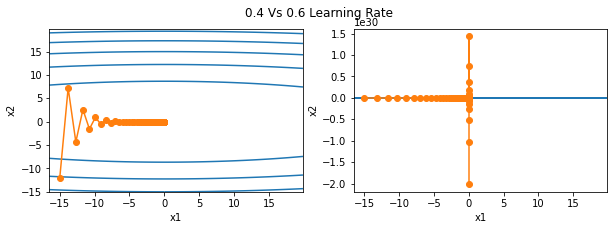

In [40]:
def plot_gd_update_2d(results):
    plt.figure(figsize=(10, 3))
    plt.suptitle("0.4 Vs 0.6 Learning Rate")
    subplots = [121, 122]
    for result, subplot in zip(results, subplots):
        plt.subplot(subplot)
        x1, x2 = tf.meshgrid(tf.range(-16.5, 20.0, 0.1),
                          tf.range(-15.0, 20.0, 0.1))
        plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
        plt.plot(*zip(*result), '-o', color='#ff7f0e')
        plt.xlabel('x1')
        plt.ylabel('x2')

plot_gd_update_2d([res_low_lr, res_high_lr])

### Observations

* In LHS figure, gradients in x2 is high compared to x1 -> it is trivial as with constant learning rate along both directions cant guarantee smooth movements in this problem

* Low LR -> it wont diverge in x2 but slow along x1

* High LR -> move fast in x1, but diverge in x2.

* Even slight increase in LR from 0.4 to 0.6 we have seen convergence got better in x1 (RHS), but overall quality worse

## Use Momentum

* We solve above problem using aggregated gradients

* an aggregated gradient along x2 will reduce step size due to oscillations that cancel each other

$$ v_t = \beta\  v_{t-1} + \nabla_{t-1} $$
$$ w_t = w_{t-1} - \eta \ v_t $$

In [41]:
def momentum_2d(w1, w2, v1, v2, eta, beta):
    v1 = beta*v1 + 0.2*w1
    v2 = beta*v2 + 4*w2
    return w1 - eta*v1, w2 - eta*v2, v1, v2

learning_rate, beta = 0.6, 0.9

In [42]:
def grad_desc_2d(init_val, learning_rate, beta):
    x1, x2 = init_val
    results = [(x1, x2)]
    v1, v2 = 0, 0
    for i in range(200):
        x1, x2, v1, v2 = momentum_2d(x1, x2, v1, v2, learning_rate, beta)
        results.append((x1, x2))
    return results

In [43]:
res_low_lr = grad_desc_2d(init_val = [-15, -12], learning_rate = 0.4, beta = 0.5)
res_high_lr = grad_desc_2d(init_val = [-15, -12], learning_rate = 0.6, beta = 0.5)

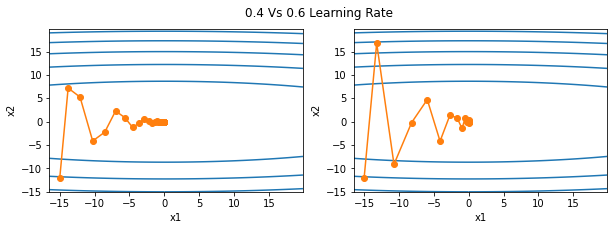

In [44]:
plot_gd_update_2d([res_low_lr, res_high_lr])

In [45]:
def plot_gd_update(results):
    plt.figure(figsize=(10, 3))
    x1, x2 = tf.meshgrid(tf.range(-16.5, 20.0, 0.1),
                        tf.range(-15.0, 20.0, 0.1))
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    plt.xlabel('x1')
    plt.ylabel('x2')

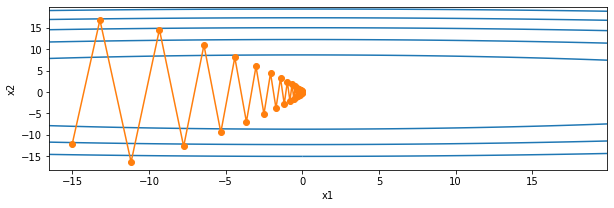

In [47]:
## beta = 0.25
res_low_lr = grad_desc_2d(init_val = [-15, -12], learning_rate = 0.6, beta = 0.25)
plot_gd_update(res_low_lr)

### Observations

* Momentum provides an upgrade to SGD and Minibatch GD in solving ill-conditioned problems

* Aggregating gradients avoids **oscillations** in steps and smoother convergence

* Tune $\beta$ for amount of memory you want to choose

* Eventhough lowering $\beta$ in above plot doesnt look like converged solution it is better than without momentum (when it diverges!)